In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.3.0'

In [ ]:
import numpy as np

In [ ]:
import matplotlib

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import random

In [ ]:
%matplotlib inline

In [ ]:
X = np.array([[1,0,1,0],[1,0,1,1],[0,1,0,1]])

In [ ]:
X = X.T

In [ ]:
Y= np.array([[1],[1],[0]])

In [ ]:
Y =Y.T

In [ ]:
inputLayerNeurons=X.shape[0]

In [ ]:
hiddenlayerNeurons = 3

In [ ]:
outputNeurons = 1

In [ ]:
np.random.seed(2)
w_ih = np.random.uniform(size=(inputLayerNeurons,hiddenlayerNeurons))
w_ho = np.random.uniform(size=(hiddenlayerNeurons,outputNeurons))

In [ ]:
w_ih

array([[0.4359949 , 0.02592623, 0.54966248],
       [0.43532239, 0.4203678 , 0.33033482],
       [0.20464863, 0.61927097, 0.29965467],
       [0.26682728, 0.62113383, 0.52914209]])

In [ ]:
w_ho

array([[0.13457995],
       [0.51357812],
       [0.18443987]])

In [ ]:
def sigmoid(x):
    return 1/(1+ np.exp(-x))

In [ ]:
hiddenLayerInput = np.dot(w_ih.T,X)
hiddenLayerActivationss = sigmoid(hiddenLayerInput)

In [ ]:
hiddenLayerOutput = np.dot(w_ho.T,hiddenLayerActivationss)
output = sigmoid(hiddenLayerOutput)

In [ ]:
error =np.square( Y - output)/2

In [ ]:
# Rate of change of error between hidden and output layer

deByDOut = output-Y

In [ ]:
dOutByDz2 = np.multiply(output,(1-output))

In [ ]:
dz2ByDWho= hiddenLayerActivationss

In [ ]:
 deByDWh0 = np.dot(dz2ByDWho,(deByDOut * dOutByDz2).T) 



In [ ]:
# Rate of change of error between input and hidden layer
dz1ByDwih = X
dh1ByDz1 = np.multiply(hiddenLayerInput ,(1-hiddenLayerInput))
dz2ByDh1 = w_ho.T
deByDWih = np.dot(dz1ByDwih,np.multiply(np.dot((deByDOut * dOutByDz2).T,dz2ByDh1),dh1ByDz1))
deByDWih_new =np.dot(dz1ByDwih, np.dot(dz2ByDh1.T, (deByDOut * dOutByDz2)) * dh1ByDz1)
deByDWih_new_new =  np.dot(dz1ByDwih,dh1ByDz1 * np.dot(dz2ByDh1.T,(deByDOut * dOutByDz2)))
deByDWih_new_new_new =np.dot(dz1ByDwih,np.dot(np.dot(dh1ByDz1,dz2ByDh1.T),(deByDOut*dOutByDz2)))
deByDWih_1= np.dot(dz1ByDwih,(dh1ByDz1 * np.dot(dz2ByDh1.T,(deByDOut * dOutByDz2))))

In [ ]:
# Update the weights according to gradient descent
alpha = 0.00635998
w_ih = w_ih - (alpha*deByDWih)
w_ho = w_ho - (alpha*deByDWh0)


In [ ]:
# Training for N epochs
error_epoch = []
epochs = 10000
for i in range(epochs):
    # Forward Propogation

    # Hidden Layer Activations
    hiddenLayerInput = np.dot(w_ih.T,X)
    hiddenLayerActivationss = sigmoid(hiddenLayerInput)

    # Calculating the output
    hiddenLayerOutput = np.dot(w_ho.T,hiddenLayerActivationss)
    output = sigmoid(hiddenLayerOutput)

    # Backpropogation

    # Calculation of Error
    error =np.square( Y - output)/2
    deByDOut = output-Y
    dOutByDz2 = np.multiply(output ,(1-output))
    dz2ByDWho= hiddenLayerActivationss
    deByDWh0 = np.dot(dz2ByDWho,(deByDOut * dOutByDz2).T)
    dz1ByDwih = X
    dh1ByDz1 = np.multiply(hiddenLayerInput,(1-hiddenLayerInput))
    dz2ByDh1 = w_ho.T
    deByDWih =np.dot(dz1ByDwih,dh1ByDz1 * np.dot(dz2ByDh1.T,(deByDOut * dOutByDz2)))
    deByDWih_new =np.dot(dz1ByDwih, np.dot(dz2ByDh1.T, (deByDOut * dOutByDz2)) * dh1ByDz1)
    deByDWih_new_new_new =np.dot(dz1ByDwih,np.dot(np.dot(dh1ByDz1,dz2ByDh1.T),(deByDOut*dOutByDz2)))
    deByDWih_new_new =  np.dot(dz1ByDwih,dh1ByDz1 * np.dot(dz2ByDh1.T,(deByDOut * dOutByDz2)))
    deByDWih_1= np.dot(dz1ByDwih,(dh1ByDz1 * np.dot(dz2ByDh1.T,(deByDOut * dOutByDz2))))
    # Update the weights according to gradient descent

    w_ih = w_ih - (alpha*deByDWih)
    w_ho = w_ho - (alpha*deByDWh0)

    # Appending of Error of each epoch
    error_epoch.append(np.average(error))

     





    


In [ ]:
w_ho

array([[ 0.04317453],
       [-1.45748772],
       [ 1.31532504]])

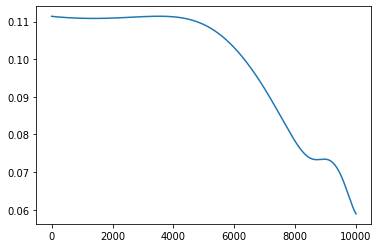

In [ ]:
plt.plot(np.arange(1,epochs+1),np.array(error_epoch))

In [ ]:
output

array([[0.76738143, 0.7372489 , 0.47970213]])

In [ ]:
Y

array([[1, 1, 0]])

In [ ]:
error

array([[0.0270557 , 0.03451907, 0.11505707]])